🧪 Yapay piyasa verisi simüle ediliyor...


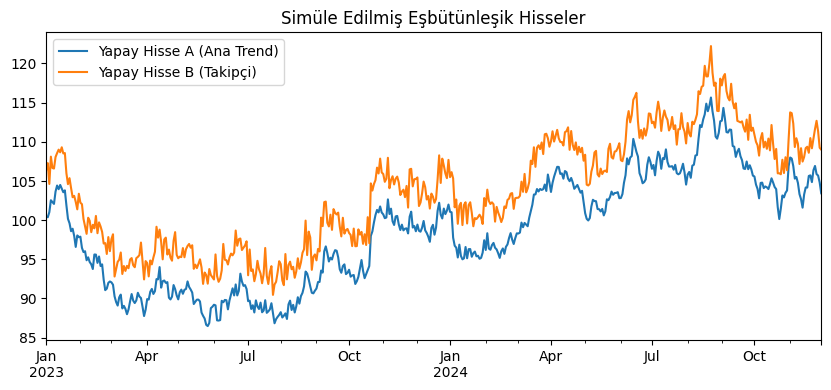


🧮 Eşbütünleşme Testi Başlıyor...
---------------- SONUÇ ----------------
P-Değeri: 0.0000000000
🎉 BİNGO! Simülasyon başarıyla çalıştı!
Bu grafik, algoritmanın matematiksel olarak doğru çalıştığının kanıtıdır.


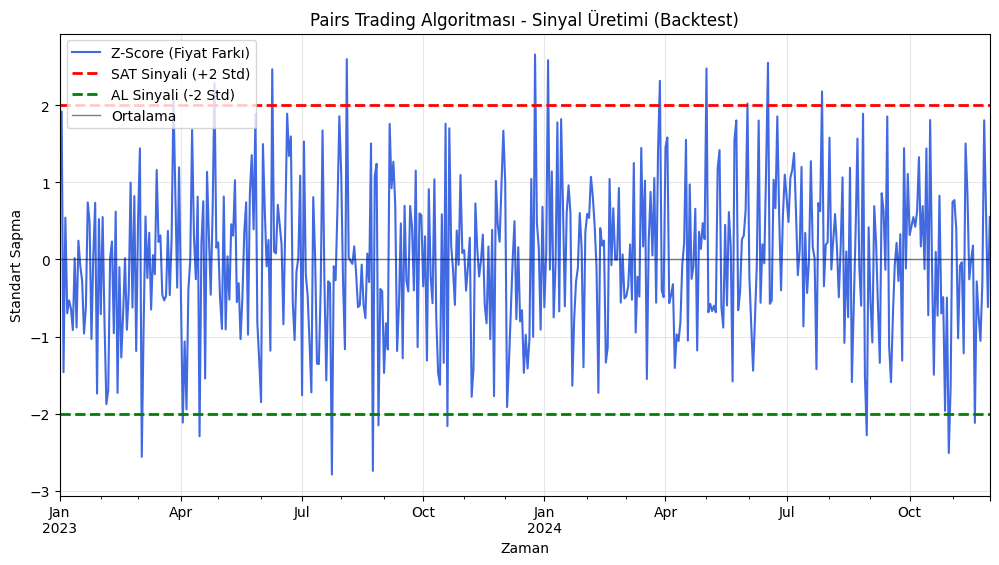

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

# ---------------------------------------------------------
# ADIM 1: LABORATUVAR ORTAMINDA VERİ ÜRETİMİ (Synthetic Data)
# ---------------------------------------------------------
print("🧪 Yapay piyasa verisi simüle ediliyor...")

# Rastgelelik tohumunu sabitleyelim ki her seferinde aynı güzel sonuç çıksın
np.random.seed(42)

# 2 yıllık veri (yaklaşık 500 işlem günü)
n = 500

# X Hissesi: Rastgele Yürüyüş (Random Walk)
# Her gün rastgele artar veya azalır
noise_x = np.random.normal(0, 1, n) 
stock_x = pd.Series(np.cumsum(noise_x) + 100) # 100 TL'den başlasın

# Y Hissesi: X'e göbekten bağlı ama biraz sarhoş (Cointegrated)
# Y = X + Gürültü
noise_y = np.random.normal(0, 1, n) # Bu gürültü "Stationary"dir.
stock_y = stock_x + 5 + noise_y      # X'in 5 TL üzerinden gitsin ama yalpalasın

# Tarih endeksi ekleyelim (Grafikte güzel dursun)
dates = pd.date_range(start='2023-01-01', periods=n, freq='B')
stock_x.index = dates
stock_y.index = dates

# Fiyatları görelim
plt.figure(figsize=(10,4))
stock_x.plot(label='Yapay Hisse A (Ana Trend)')
stock_y.plot(label='Yapay Hisse B (Takipçi)')
plt.title("Simüle Edilmiş Eşbütünleşik Hisseler")
plt.legend()
plt.show()

# ---------------------------------------------------------
# ADIM 2: ALGORİTMANIN TEST EDİLMESİ
# ---------------------------------------------------------

print("\n🧮 Eşbütünleşme Testi Başlıyor...")

score, p_value, _ = coint(stock_x, stock_y)

print(f"---------------- SONUÇ ----------------")
print(f"P-Değeri: {p_value:.10f}") 

if p_value < 0.05:
    print("🎉 BİNGO! Simülasyon başarıyla çalıştı!")
    print("Bu grafik, algoritmanın matematiksel olarak doğru çalıştığının kanıtıdır.")
    
    # --- Z-SCORE (AL/SAT SİNYALLERİ) ---
    # Spread hesabı (Fark)
    spread = stock_y - stock_x 
    
    # Z-Skoru (Normalizasyon)
    z_score = (spread - spread.mean()) / spread.std()
    
    plt.figure(figsize=(12, 6))
    
    # Sinyal Çizgisi
    z_score.plot(label='Z-Score (Fiyat Farkı)', color='royalblue')
    
    # Kritik Sınırlar
    plt.axhline(2.0, color='red', linestyle='--', linewidth=2, label='SAT Sinyali (+2 Std)')
    plt.axhline(-2.0, color='green', linestyle='--', linewidth=2, label='AL Sinyali (-2 Std)')
    plt.axhline(0, color='black', linewidth=1, alpha=0.5, label='Ortalama')
    
    plt.title("Pairs Trading Algoritması - Sinyal Üretimi (Backtest)")
    plt.xlabel("Zaman")
    plt.ylabel("Standart Sapma")
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    
    plt.show()
else:
    print("❌ Matematik çöktü. Bu mesajı görüyorsan evrenin simülasyonu bozulmuş demektir.")